## Условие задачи:

__Задача #4__

_По материалам лекции 5 и 6_

Реализовать компьютерную симуляцию модели SIR:

* Логика модели:
    * каждый узел находится в одном из двух состояний $\{ S, I, R\}$
    * на 0-м шаге 1 узел устанавливаются в состояние $I$ (остальные - в $S$)
    * На каждом шаге каждый из инфецированных узлов с вероятностю $\beta$ заражает каждый из связанных с ним уязвимых узлов
    * Каждый инфецированный узел остается инфецированным $\tau_\gamma =1/\gamma$ временных шагов, после чего переходит в состояние $R$ и не может быть вновь инфецированным. Кроме того узлы в состоянии $R$ не распространяют инфекцию.

С помощью визуализации показать корректную работу модели.

Используя данные эмперической сети (предпочтительно отражающей социальные взаимодействия) имеющий не менее 200 и не более 1000 узлов провести 100 симуляций эпидемии. Для каждого узла сети рассичтать среднее время (в шагах модели) до инфицирования. Построить 4 графика зависимости среднего времени до инфецирования от 4 изученных метрик центральности.

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib as mpl

In [1]:
nx.__version__

NameError: name 'nx' is not defined

In [119]:
mpl.style.use('seaborn-poster')

In [120]:
G = nx.read_weighted_edgelist("moreno_oz/out.moreno_oz_oz", delimiter=' ', comments='%')

In [121]:
len(G)

217

C:\conda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


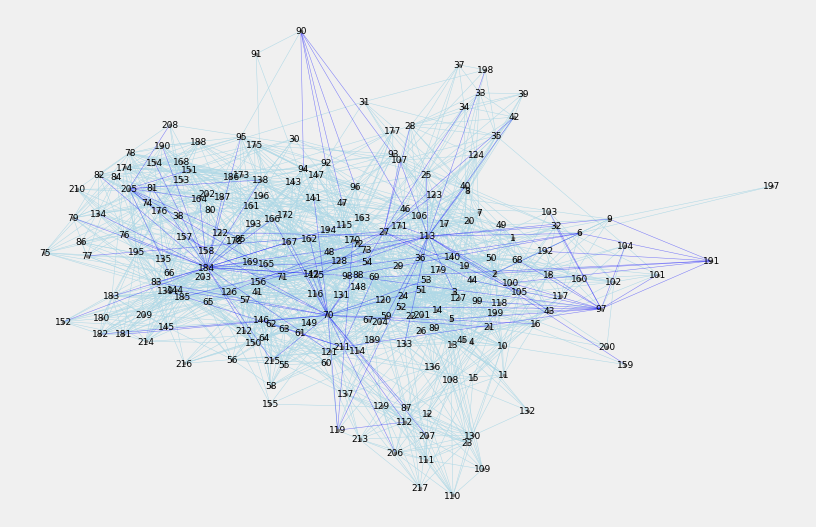

In [122]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 2]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 2]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='grey')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=0.5, edge_color='lightblue',)

nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=0.5, alpha=0.5, edge_color='blue')

# labels
nx.draw_networkx_labels(G, pos, font_size=9)

plt.axis('off')
plt.show()